58889256/58889256 [==============================] - 0s 0us/step
Found 989 images belonging to 3 classes.
Found 171 images belonging to 3 classes.


<ipython-input-2-fc5d59ab4683>:51: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(training_set,


Epoch 1/5
31/31 [==============================] - 729s 23s/step - loss: 1.3473 - accuracy: 0.4671 - val_loss: 0.8577 - val_accuracy: 0.6550
Epoch 2/5
31/31 [==============================] - 675s 22s/step - loss: 0.7268 - accuracy: 0.7108 - val_loss: 0.8082 - val_accuracy: 0.6608
Epoch 3/5
31/31 [==============================] - 702s 23s/step - loss: 0.5796 - accuracy: 0.7695 - val_loss: 0.7987 - val_accuracy: 0.6667
Epoch 4/5
31/31 [==============================] - 651s 21s/step - loss: 0.5010 - accuracy: 0.7917 - val_loss: 0.8031 - val_accuracy: 0.7018
Epoch 5/5
31/31 [==============================] - 702s 23s/step - loss: 0.4075 - accuracy: 0.8352 - val_loss: 0.8742 - val_accuracy: 0.6784


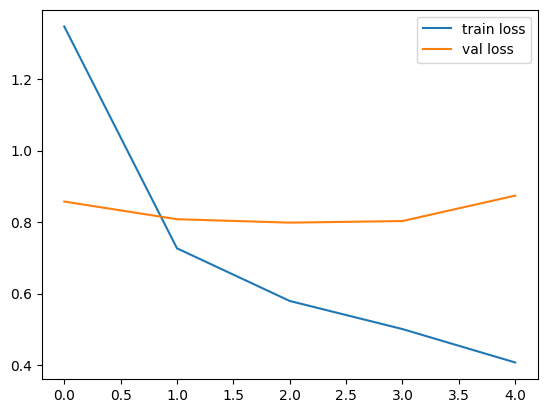

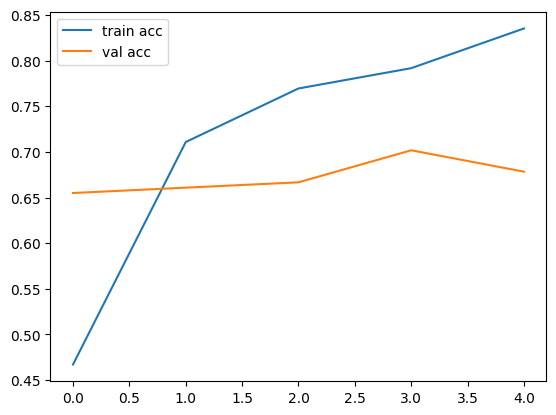

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from keras.layers import Input, Flatten, Dense
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Define image size
IMAGE_SIZE = [224, 224]

# Load the pre-trained VGG16 model
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

# Freeze the layers of the pre-trained VGG16 model
for layer in vgg.layers:
    layer.trainable = False

# Specify the number of classes
num_classes = 3  # Front, Rear, Side

# Flatten the output of VGG16
x = Flatten()(vgg.output)

# Add a dense layer with softmax activation for classification
prediction = Dense(num_classes, activation='softmax')(x)

# Create the model
model = Model(inputs=vgg.input, outputs=prediction)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Data generators for training and validation
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory('training_dataset',
                                                 target_size=(224, 224),
                                                 batch_size=32,
                                                 class_mode='categorical')

test_set = test_datagen.flow_from_directory('/testing_dataset',
                                            target_size=(224, 224),
                                            batch_size=32,
                                            class_mode='categorical')

# Train the model
history = model.fit_generator(training_set,
                              validation_data=test_set,
                              epochs=5,
                              steps_per_epoch=len(training_set),
                              validation_steps=len(test_set))

# Plot loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()

# Plot accuracy
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

# Save the model
model.save('location.h5')
